Nama: Erina Sandriani

Nim 20220801073

Studi Kasus: Deteksi Diabetes

Deskripsi Kasus: Studi kasus ini bertujuan untuk memprediksi apakah seorang pasien menderita diabetes atau tidak berdasarkan beberapa pengukuran diagnostik

* **IMPORT LIBRARY**

library yang digunakan dalam kode: NumPy, Pandas, Matplotlib, Seaborn, scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

* **LOAD DATASET**

Dataset dibaca dari URL menggunakan pandas.read_csv(). Data ini berisi informasi terkait beberapa pengukuran kesehatan yang relevan untuk mendeteksi diabetes.

In [ ]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

* **KOLOM DATASET**

In [ ]:
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

* **KONVERSI KE DATAFRAME**

Mengonversi data fitur dan label menjadi format DataFrame menggunakan pandas, agar lebih mudah dibaca dan dianalisis.

In [ ]:
df = pd.read_csv(url, names=column_names)

* **TAMPILKAN DATA**

Menampilkan lima baris pertama dari dataset untuk memberikan gambaran tentang struktur data yang akan digunakan.

In [2]:
print("Dataset Pima Indians Diabetes (5 Baris Pertama):")
print(df.head())

Dataset Pima Indians Diabetes (5 Baris Pertama):
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


* **PEMISAHAN DATA**

Data dipecah menjadi fitur (X) dan label (y), di mana label Outcome memiliki nilai 0 (tidak diabetes) dan 1 (diabetes).

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

Data dibagi menjadi set pelatihan (80%) dan pengujian (20%) menggunakan train_test_split().

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* **MODEL RANDOM FOREST**

Menginisialisasi model Random Forest Classifier dengan 100 estimator (pohon keputusan). Random Forest adalah teknik ensemble yang menggabungkan beberapa pohon keputusan untuk meningkatkan akurasi model.

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

* **PELATIHAN MODEL**

Melatih model menggunakan data pelatihan. Fungsi fit() mengadaptasi model dengan data untuk mempelajari pola-pola yang ada.

In [ ]:
rf_clf.fit(X_train, y_train)

* **PREDIKSI**

Menggunakan model yang telah dilatih untuk memprediksi label dari data pengujian.

In [ ]:
y_pred = rf_clf.predict(X_test)

* **AKURASI MODEL**

Menghitung akurasi model dengan membandingkan prediksi (y_pred) dengan label sebenarnya (y_test) menggunakan accuracy_score().

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model Random Forest: {accuracy * 100:.2f}%")

* **CONFUSION MATRIX**

Membuat confusion matrix untuk mengevaluasi hasil prediksi. Confusion matrix memberikan gambaran tentang jumlah prediksi yang benar dan salah untuk setiap kelas.

In [3]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriks Kebingungan:")
print(conf_matrix)


Matriks Kebingungan:
[[77 22]
 [21 34]]


* **VISUALISASI CONFUSION MATRIX**

Menggunakan Seaborn untuk memvisualisasikan confusion matrix. sns.heatmap() membuat grafik yang menunjukkan hasil prediksi secara lebih intuitif.

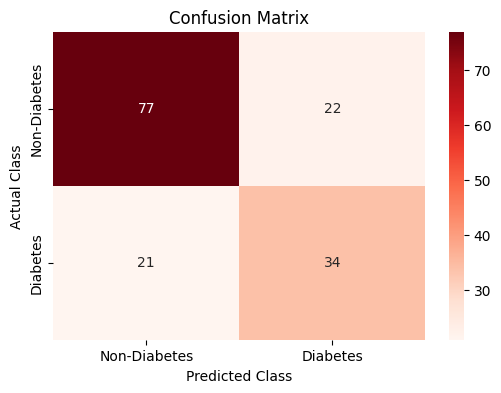

In [5]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Non-Diabetes', 'Diabetes'], yticklabels=['Non-Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

* **PREDIKSI DENGAN DATA BARU**

Memberikan contoh bagaimana model dapat digunakan untuk memprediksi risiko diabetes berdasarkan data pasien baru.

In [6]:
sample_data = np.array([[6, 148, 72, 35, 0, 33.6, 0.627, 50]])
predicted_class = rf_clf.predict(sample_data)
result = 'Diabetes' if predicted_class[0] == 1 else 'Non-Diabetes'
print(f"Prediksi untuk data {sample_data}: {result}")

Prediksi untuk data [[  6.    148.     72.     35.      0.     33.6     0.627  50.   ]]: Diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
